# Customer Segmentation Analysis

## Contents
### Part I. Data Exploration
### Part II. Segmentation Analysis
### Part III. K-Means

## Setup the environment and load the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### The dataset can be downloaded from the kaggle website: 
### Named: CustomerSegmentation (train.csv)
### https://www.kaggle.com/prathmeshpatil12/customersegmentation/data?select=Train.csv

In [2]:
# Read csv fill without header
path = "/Users/Julia/Desktop/SUMMER+FALL 2021/Fall 2021/ISE 535/Project/Train.csv"
df = pd.read_csv(path,header=0)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Part I. Data Exploration 
### Part 1.1 To understand the raw data

In [3]:
# check the size of the dataset
df.shape, df.size

((8068, 11), 88748)

In [4]:
#Remove the 'ID' and 'Var_1' columns from the raw data
newdf=df.drop(['ID','Var_1'], axis=1)
newdf.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [5]:
# Drop off the missing value
newdf1=newdf.dropna()
newdf1.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [6]:
#Check out statistics for each numerical variables
newdf1.describe()

,Age,Work_Experience,Family_Size
count,6718.000000,6718.000000,6718.000000
mean,43.524263,2.629652,2.841768
std,16.513115,3.404639,1.523319
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


### Part 1.2 Understand each variables

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

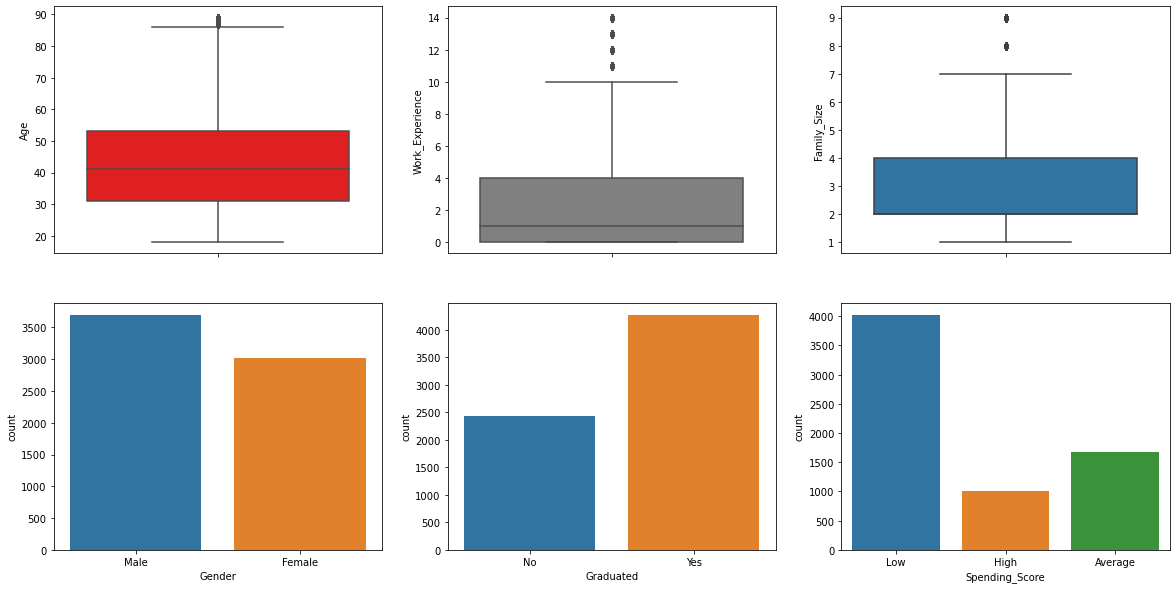

In [7]:
# boxplot for numerical variables
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(y='Age',data=newdf1, ax=axss[0][0], color='red')
sns.boxplot(y='Work_Experience',data=newdf1, ax=axss[0][1], color='grey')
sns.boxplot(y='Family_Size',data=newdf1, ax=axss[0][2])

# bar chart for categoriacal variables
sns.countplot(x='Gender',data=newdf1, ax=axss[1][0])
sns.countplot(x='Graduated',data=newdf1, ax=axss[1][1])
sns.countplot(x='Spending_Score',data=newdf1, ax=axss[1][2])

<AxesSubplot:ylabel='Profession'>

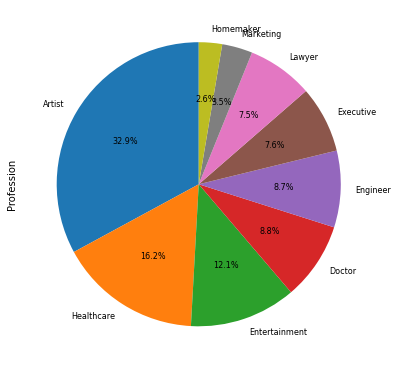

In [8]:
# pie chart to check the percentage of the variable profession
plt.figure(figsize=(14,8))
ax1 = plt.subplot(121, aspect='equal')
newdf1['Profession'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%',startangle=90, shadow=False, fontsize=8)

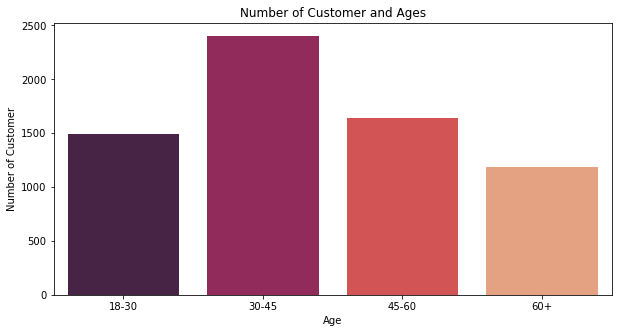

In [9]:
age18_30 = newdf1.Age[(newdf1.Age >= 18) & (newdf1.Age < 30)]
age30_45 = newdf1.Age[(newdf1.Age >= 30) & (newdf1.Age < 45)]
age45_60 = newdf1.Age[(newdf1.Age >= 45) & (newdf1.Age < 60)]
age60above = newdf1.Age[newdf1.Age >= 60]

x = ["18-30","30-45","45-60","60+"]
y = [len(age18_30.values),len(age30_45.values),len(age45_60.values),len(age60above.values)]


plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [10]:
# map the data to assign the values for different spending score
newdf2=newdf1.copy()
newdf2
newvalue={'Low':1, 'Average':2, 'High':3}
newdf2['Spending_Score']=newdf2['Spending_Score'].map(newvalue)
newdf2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,1,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,1,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,B
5,Male,Yes,56,No,Artist,0.0,2,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,1,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,3,5.0,B
8064,Male,No,35,No,Executive,3.0,1,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,1,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,1,4.0,B


In [11]:
#Group by sex and names, to get the size number for each profession
groupdf=newdf2.groupby(['Spending_Score','Profession']).size()
groupdf

Spending_Score  Profession   
1               Artist           1108
                Doctor            410
                Engineer          356
                Entertainment     507
                Executive         102
                Healthcare       1017
                Homemaker         113
                Lawyer            217
                Marketing         199
2               Artist            889
                Doctor            161
                Engineer          179
                Entertainment     275
                Executive          63
                Healthcare         37
                Homemaker          47
                Lawyer             16
                Marketing          10
3               Artist            214
                Doctor             23
                Engineer           51
                Entertainment      33
                Executive         344
                Healthcare         35
                Homemaker          18
                Lawy

<AxesSubplot:xlabel='Spending_Score'>

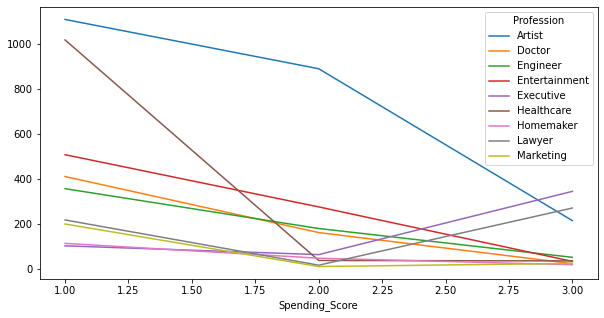

In [12]:
# plot data for each profession, how does amount change based on different spending score
fig, ax = plt.subplots(figsize=(10,5))
newdf2.groupby(['Spending_Score','Profession']).size().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Spending_Score,Profession'>

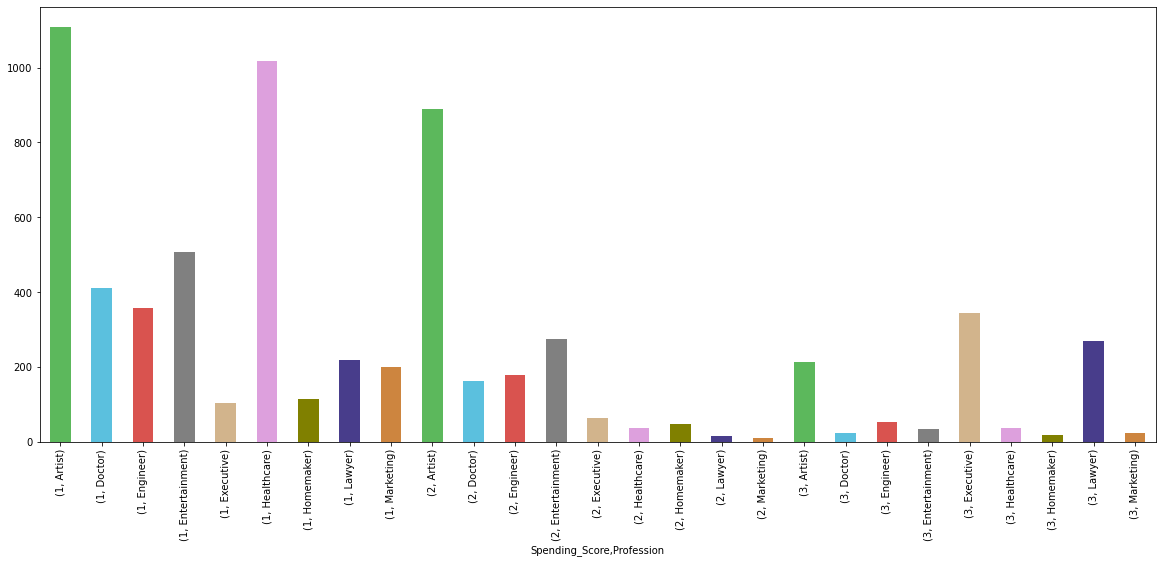

In [13]:
# Use the bar plot to show the amount for each profession of each spending level
groupdf=newdf2.groupby(['Spending_Score','Profession']).size()
groupdf.plot(kind="bar",figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','grey','tan','plum','olive','darkslateblue','peru'])

<AxesSubplot:xlabel='Spending_Score,Profession'>

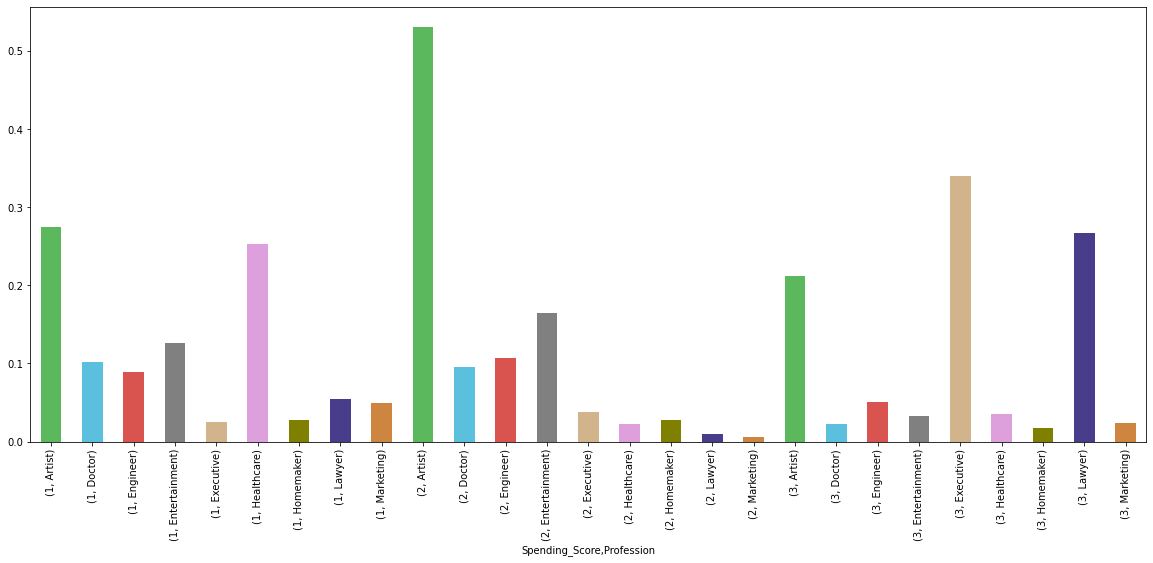

In [14]:
# Same groupby method but present proportion plot united by each spending level
groupdf1 = newdf2.groupby(['Spending_Score','Profession']).size()
sum1 = newdf2.groupby(['Spending_Score']).size()
for jj, item in enumerate(sum1):
    #print(jj, item, groupdf[groupdf.index.isin([jj+1], level = 0)])
    groupdf1[groupdf1.index.isin([jj+1], level = 0)] = groupdf1[groupdf1.index.isin([jj+1], level = 0)] / item
groupdf1.plot(kind="bar",figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','grey','tan','plum','olive','darkslateblue','peru'])

## Part II. Segmentation Analysis



In [15]:
newdf2.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,1,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,1,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,B
5,Male,Yes,56,No,Artist,0.0,2,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,1,3.0,C


### Part 2.1 Processing dataset for further segmentation analysis

In [16]:
# Copy the column segmentation and name it as label
clusters = newdf2.iloc[:,8]
newdf2["label"] = clusters

In [17]:
newdf3=newdf2.copy()
newdf3
# Transform categoriacal variables
newv1={'No':0, 'Yes':1}
newv2={'No':0, 'Yes':1}
newv={'A':1, 'B':2, 'C':3, 'D':4}
newdf3['Ever_Married']=newdf3['Ever_Married'].map(newv1)
newdf3['Graduated']=newdf3['Graduated'].map(newv2)
newdf3['Segmentation']=newdf3['Segmentation'].map(newv)
newdf3

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,label
0,Male,0,22,0,Healthcare,1.0,1,4.0,4,D
2,Female,1,67,1,Engineer,1.0,1,1.0,2,B
3,Male,1,67,1,Lawyer,0.0,3,2.0,2,B
5,Male,1,56,0,Artist,0.0,2,2.0,3,C
6,Male,0,32,1,Healthcare,1.0,1,3.0,3,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,1,41,1,Artist,0.0,3,5.0,2,B
8064,Male,0,35,0,Executive,3.0,1,4.0,4,D
8065,Female,0,33,1,Healthcare,1.0,1,1.0,4,D
8066,Female,0,27,1,Healthcare,1.0,1,4.0,2,B


### Part 2.2.1 Explore the relationship of three numerical variables with the segmentation

A


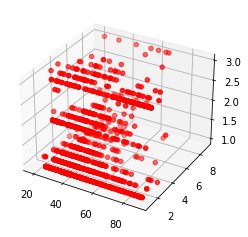

B


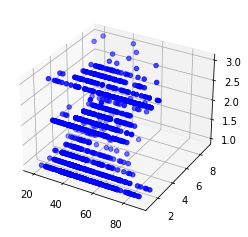

C


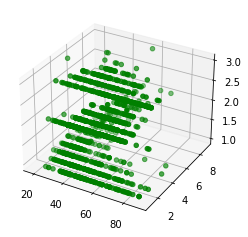

D


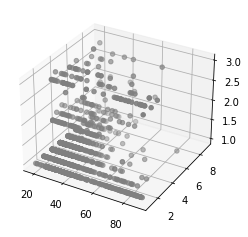

In [18]:
# Create 3D plot to see the relationship of 'Age','Family_Size','Spending_Score' by different segmentation
from mpl_toolkits.mplot3d import Axes3D

x = newdf3["Age"]
y = newdf3["Family_Size"]
z = newdf3["Spending_Score"]
c = newdf3["Segmentation"]
col = ["Red", "Blue", "Green", "Gray"]

for ii, seg in enumerate(["A", "B", "C", "D"]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(seg)
    x1 = x[newdf3["label"] == seg]
    y1 = y[newdf3["label"] == seg]
    z1 = z[newdf3["label"] == seg]
    c1 = c[newdf3["label"] == seg]
    img = ax.scatter(x1, y1, z1, c=col[ii])
    plt.show()


1


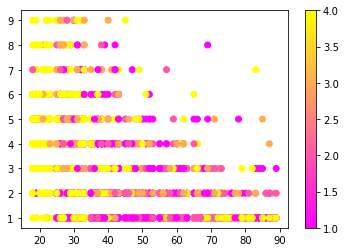

2


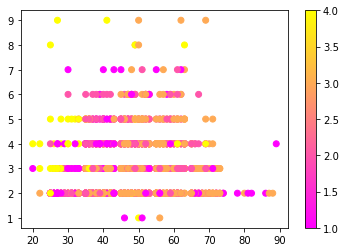

3


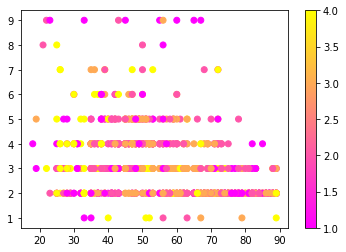

In [19]:
#Same purpose as the previous, this time we use heat map to present different segmentations by spending level
from mpl_toolkits.mplot3d import Axes3D

x = newdf3["Age"]
y = newdf3["Family_Size"]
z = newdf3["Spending_Score"]
c = newdf3["Segmentation"]
col = ["Red", "Blue", "Green", "Gray"]
for ii, char in enumerate([1, 2, 3]):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print(char)
    x1 = x[newdf3["Spending_Score"] == char]
    y1 = y[newdf3["Spending_Score"] == char]
    c1 = c[newdf3["Spending_Score"] == char]
    
    img = ax.scatter(x1, y1, c=c1, cmap=plt.spring())
    fig.colorbar(img)
    plt.show()

In [20]:
newdf3.groupby("Segmentation").describe()

Ever_Married                                               \
                    count      mean       std  min  25%  50%  75%  max   
Segmentation                                                             
1                  1628.0  0.581695  0.493432  0.0  0.0  1.0  1.0  1.0   
2                  1583.0  0.734049  0.441978  0.0  0.0  1.0  1.0  1.0   
3                  1735.0  0.802305  0.398375  0.0  1.0  1.0  1.0  1.0   
4                  1772.0  0.267494  0.442777  0.0  0.0  0.0  1.0  1.0   

                 Age             ... Spending_Score      Family_Size  \
               count       mean  ...            75%  max       count   
Segmentation                     ...                                   
1             1628.0  44.417076  ...            2.0  3.0      1628.0   
2             1583.0  48.079596  ...            2.0  3.0      1583.0   
3             1735.0  49.292219  ...            2.0  3.0      1735.0   
4             1772.0  32.987020  ...            1.0  3.0      1772.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Segmentation                                               
1             2.434889  1.479235  1.0  1.0  2.0  3.0  9.0  
2             2.684776  1.409670  1.0  2.0  2.0  4.0  9.0  
3             2.960807  1.373529  1.0  2.0  3.0  4.0  9.0  
4             3.239278  1.680013  1.0  2.0  3.0  4.0  9.0  

[4 rows x 48 columns]

### Part 2.2.2 Explore the relationship of two categorical variables with the segmentation

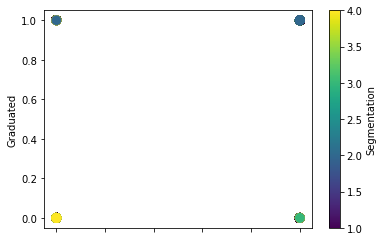

In [21]:
newdf3.plot.scatter(x='Ever_Married', y='Graduated', c="Segmentation", cmap="viridis", s=80);

In [56]:
newdf4 = newdf3.iloc[:,0:9]

## Part III. K-Means Clustering

### Part 3.1 Elbow method for presenting different WCSS vs. K Value

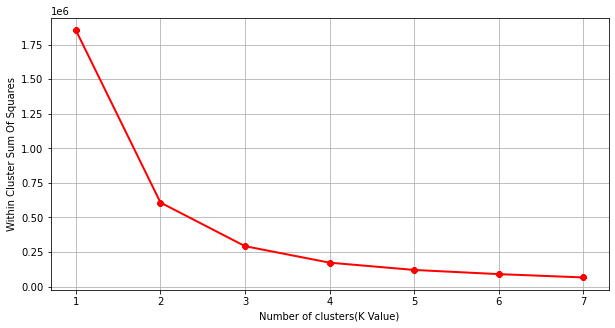

In [24]:
#Plot for Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value)
w = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(newdf3.iloc[:,[1,3,2,6,7]])
    w.append(kmeans.inertia_)
plt.figure(figsize=(10,5))    
plt.grid()
plt.plot(range(1,8), w, linewidth=2, color="red", marker ="8")

plt.xlabel("Number of clusters(K Value)")
plt.ylabel("Within Cluster Sum Of Squares")
plt.show()


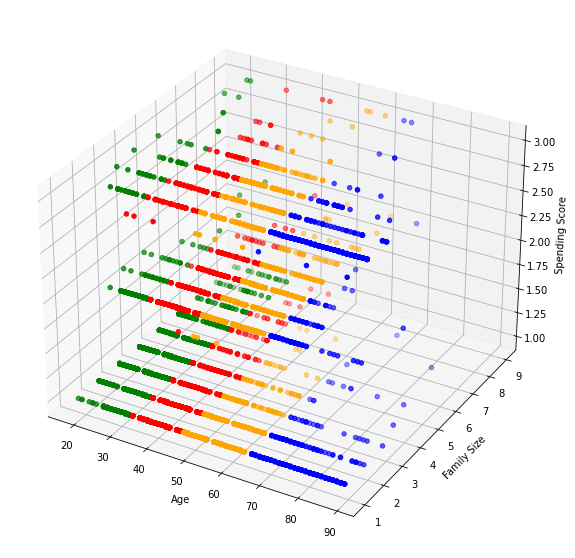

In [33]:
# Plot final cluster data with 3D
km = KMeans(n_clusters=4)
clusters = km.fit_predict(newdf3.iloc[:,[1,2,3,6,7]])
newdf3["label"] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf3.Age[newdf3.label == 0], newdf3["Family_Size"][newdf3.label == 0], newdf3["Spending_Score"][newdf3.label == 0], c='blue', s=20)
ax.scatter(newdf3.Age[newdf3.label == 1], newdf3["Family_Size"][newdf3.label == 1], newdf3["Spending_Score"][newdf3.label == 1], c='red', s=20)
ax.scatter(newdf3.Age[newdf3.label == 2], newdf3["Family_Size"][newdf3.label == 2], newdf3["Spending_Score"][newdf3.label == 2], c='green', s=20)
ax.scatter(newdf3.Age[newdf3.label == 3], newdf3["Family_Size"][newdf3.label == 3], newdf3["Spending_Score"][newdf3.label == 3], c='orange', s=20)
plt.xlabel("Age")
plt.ylabel("Family Size")
ax.set_zlabel('Spending Score')
plt.show()

### Part 3.2 Find the optimal K by comparing segmentation

#### Part 3.2.1 Split dataset as train and test

In [68]:
from sklearn.model_selection import train_test_split
from collections import Counter
# dataset
print(newdf4.head())

# split data into train/test
train_data, test_data = train_test_split(newdf4, test_size = .2)
train_data

   Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0    Male             0   22          0  Healthcare              1.0   
2  Female             1   67          1    Engineer              1.0   
3    Male             1   67          1      Lawyer              0.0   
5    Male             1   56          0      Artist              0.0   
6    Male             0   32          1  Healthcare              1.0   

   Spending_Score  Family_Size  Segmentation  
0               1          4.0             4  
2               1          1.0             2  
3               3          2.0             2  
5               2          2.0             3  
6               1          3.0             3  


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
63,Male,1,56,1,Lawyer,1.0,3,2.0,1
6819,Male,1,63,0,Healthcare,0.0,2,4.0,2
336,Male,0,19,0,Healthcare,1.0,1,5.0,4
741,Female,1,35,0,Engineer,2.0,2,6.0,2
6025,Male,0,33,0,Healthcare,9.0,1,3.0,3
...,...,...,...,...,...,...,...,...,...
5572,Male,0,38,1,Artist,1.0,1,1.0,2
7070,Male,1,53,1,Artist,3.0,2,3.0,3
5578,Male,1,51,0,Executive,9.0,3,2.0,3
1894,Female,1,71,1,Artist,0.0,3,4.0,2


In [156]:
#specify X (Ever_Married, Age, Graduated, Spending_Score, family_size), and y(segmentation)
# train data
train_X = train_data.iloc[:,[1,3,2,6,7]]
print(train_X.head())
train_y = train_data.iloc[:,8]
print(train_y.head())
# test data
test_X = test_data.iloc[:,[1,3,2,6,7]]
test_y = test_data.iloc[:,8]

      Ever_Married  Graduated  Age  Spending_Score  Family_Size
63               1          1   56               3          2.0
6819             1          0   63               2          4.0
336              0          0   19               1          5.0
741              1          0   35               2          6.0
6025             0          0   33               1          3.0
63      1
6819    2
336     4
741     2
6025    3
Name: Segmentation, dtype: int64


#### Part 3.2.2 Relabel the data based on their K-means groups and orginal segmentation

In [166]:
# a funciton to relabel based on the signal
def relabel_majorvote(prediction, golden):
    # number of clusters
    NumCluster = max(prediction) - min(prediction) + 1
    
    # repredict based on rule
    re_predict = prediction[:]
    rule = []
    # for each cluster in preiction using majority vote
    for ii in range(NumCluster):
        # get all indexs of that cluster
        indexs = []
        for jj, item in enumerate(prediction):
            if item == ii:
                indexs.append(jj)
        # find the golden label given indexs
        gold_sub = [golden[index] for index in indexs]
        # build a counter
        count = Counter(gold_sub)
        # find the majority 
        maj = count.most_common()[0][0]
        #print(maj)
        for index in indexs:
            re_predict[index] = maj
        rule.append(maj)
        # process
        #print(ii, indexs, gold_sub, count, maj, re_predict)
    return rule, re_predict

relabel_majorvote([1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 2, 0, 2, 2])

0 [3, 4, 5, 6, 7] [1, 2, 0, 2, 2] Counter({2: 3, 1: 1, 0: 1}) 2 [1, 1, 1, 2, 2, 2, 2, 2]
1 [0, 1, 2] [0, 1, 0] Counter({0: 2, 1: 1}) 0 [0, 0, 0, 2, 2, 2, 2, 2]


([2, 0], [0, 0, 0, 2, 2, 2, 2, 2])

#### Part 3.2.2 Set a relabel rule for test set

In [161]:
# a function for relabeling based on the rule
def relabel_rule(label_k_test, rule):
    label_k_test_update = label_k_test[:]
    for ii, num in enumerate(rule):
        # get all indexs of that cluster
        indexs = []
        for jj, item in enumerate(label_k_test):
            if item == ii:
                indexs.append(jj)
        #print(indexs, num)
        # relabel them
        for index in indexs:
            label_k_test_update[index] = num
    return label_k_test_update
relabel_rule([1, 1, 0, 0, 0, 0, 0], [2, 0])

[0, 0, 2, 2, 2, 2, 2]

#### Part 3.2.3 define accuracy function by relabeled functions

In [162]:
# Supervised Kmeans main function
def Kmeans_Supervised(train_X, train_y, test_X, test_y, NumCluster):
    # train an unsupervised Kmeans on the training data 
    model = KMeans(n_clusters = NumCluster, init = "k-means++", random_state = 0)
    model.fit(train_X)
    # get the label from the model
    label_k_train = model.labels_
    
    # relabel the label based on the train_y
    rule, label_k_update_train = relabel_majorvote(label_k_train, train_y.to_list())
    
    # get accuracy_train
    match = []
    for ii in range(len(label_k_update_train)):
        if label_k_update_train[ii] == train_y.iloc[ii]:
            match.append(1)
        else:
            match.append(0)
    acc_train = sum(match)/len(match)
    
    # predict on testing set
    label_k_test = model.predict(test_X)
    
    # relabel based on our rule
    label_k_test_update = relabel_rule(label_k_test, rule)
    
    # get accuracy_test
    match = []
    for ii in range(len(label_k_test_update)):
        if label_k_test_update[ii] == test_y.iloc[ii]:
            match.append(1)
        else:
            match.append(0)
    acc_test = sum(match)/len(match)
    
    return acc_train, acc_test

#Test
acc_train, acc_test = Kmeans_Supervised(train_X, train_y, test_X, test_y, 4)
[acc_train, acc_test]

[0.3959806475623372, 0.41443452380952384]

In [163]:
# Get the optimal k with the highest accuracy
Acc=[]
print("Result:")
for ii in range(4,20):
    acc_train, acc_test = Kmeans_Supervised(train_X, train_y, test_X, test_y, ii)
    Acc.append(acc_test)
    print("Using %d clusters: training accuracy is: %2.2f; testing accuracy is: %2.2f," % (ii, acc_train, acc_test))

print('The optimal number of cluster is:', Acc.index(max(Acc))+4)

Result:
Using 4 clusters: training accuracy is: 0.40; testing accuracy is: 0.41,
Using 5 clusters: training accuracy is: 0.30; testing accuracy is: 0.30,
Using 6 clusters: training accuracy is: 0.35; testing accuracy is: 0.35,
Using 7 clusters: training accuracy is: 0.37; testing accuracy is: 0.38,
Using 8 clusters: training accuracy is: 0.37; testing accuracy is: 0.37,
Using 9 clusters: training accuracy is: 0.38; testing accuracy is: 0.39,
Using 10 clusters: training accuracy is: 0.39; testing accuracy is: 0.40,
Using 11 clusters: training accuracy is: 0.42; testing accuracy is: 0.43,
Using 12 clusters: training accuracy is: 0.44; testing accuracy is: 0.44,
Using 13 clusters: training accuracy is: 0.43; testing accuracy is: 0.45,
Using 14 clusters: training accuracy is: 0.43; testing accuracy is: 0.45,
Using 15 clusters: training accuracy is: 0.43; testing accuracy is: 0.45,
Using 16 clusters: training accuracy is: 0.43; testing accuracy is: 0.43,
Using 17 clusters: training accuracy